In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [6]:
df = pd.read_csv('/content/Infrared.csv')  # Ganti path sesuai lokasi file
df.head()


,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralM
0,Male,41-50,White,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,...,33.4775,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525,36.59
1,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,...,34.0550,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075,37.19
2,Female,21-30,White,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,...,34.8275,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850,37.34
3,Female,21-30,Black or African-American,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,...,34.4225,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825,37.09
4,Male,18-20,White,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,...,35.1600,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175,37.04


In [7]:
#Preprocessing Data

df_encoded = pd.get_dummies(df, columns=['Gender', 'Age', 'Ethnicity'], drop_first=True)
df_encoded = df_encoded.fillna(df_encoded.median(numeric_only=True))

#Pisahkan Fitur dan Target
X = df_encoded.drop(columns=['aveOralM'])  # Target
y = df_encoded['aveOralM']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [8]:
#Normalisasi (untuk K-NN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
#Train Model
#KNN
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
#Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)


DecisionTreeRegressor(random_state=42)

In [10]:
#Prediksi
knn_pred = knn.predict(X_test_scaled)
dt_pred = dt.predict(X_test_scaled)


In [11]:
#Evaluasi
def evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

knn_mse, knn_rmse, knn_mae, knn_r2 = evaluate(y_test, knn_pred)
dt_mse, dt_rmse, dt_mae, dt_r2 = evaluate(y_test, dt_pred)

print("🔵 K-NN:")
print(f"MSE: {knn_mse:.4f}, RMSE: {knn_rmse:.4f}, MAE: {knn_mae:.4f}, R²: {knn_r2:.4f}")
print("🟠 Decision Tree:")
print(f"MSE: {dt_mse:.4f}, RMSE: {dt_rmse:.4f}, MAE: {dt_mae:.4f}, R²: {dt_r2:.4f}")


🔵 K-NN:
MSE: 0.0727, RMSE: 0.2697, MAE: 0.2136, R²: 0.6547
🟠 Decision Tree:
MSE: 0.1134, RMSE: 0.3368, MAE: 0.2547, R²: 0.4614


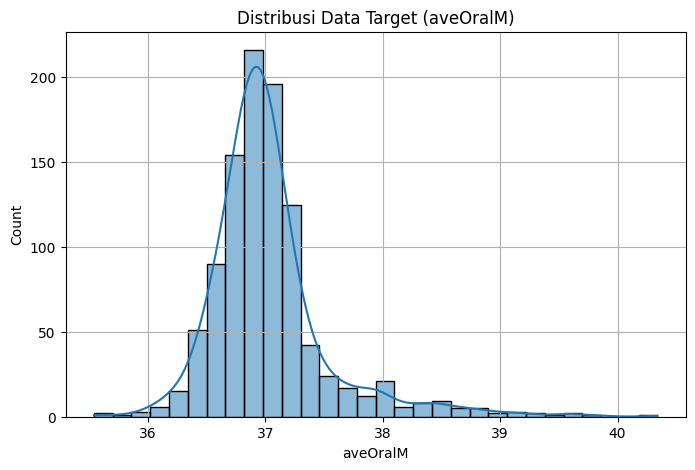

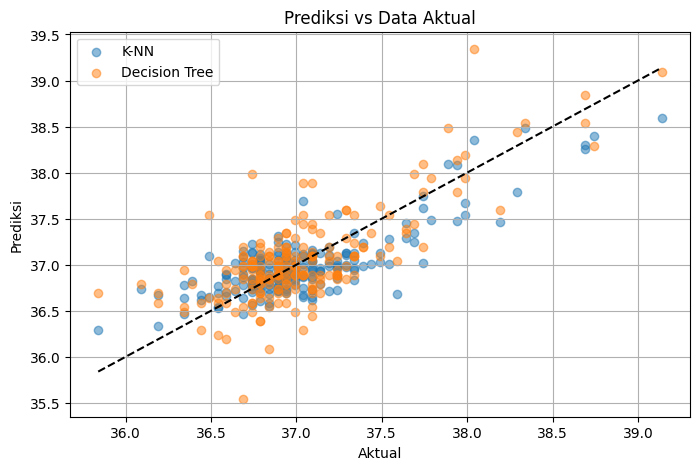

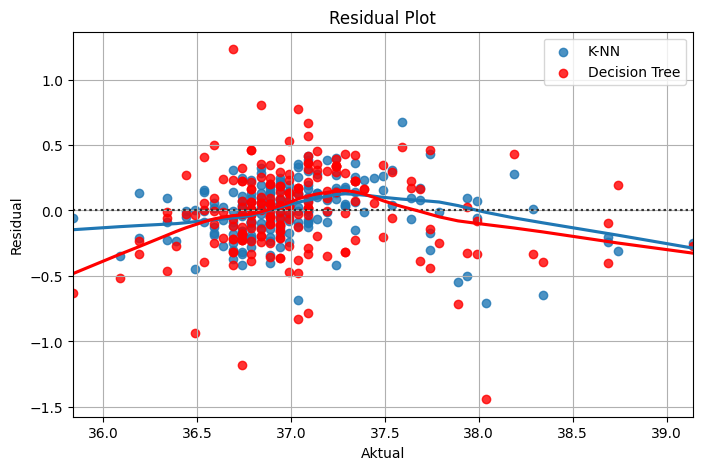

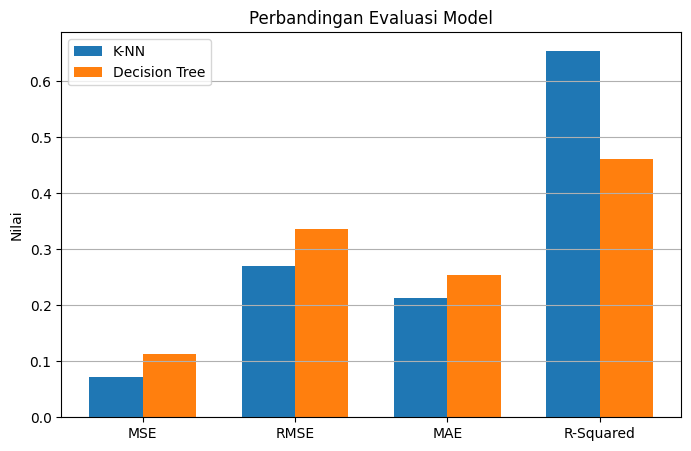

In [12]:
#Visualisasi
#Distribusi Data Target
plt.figure(figsize=(8,5))
sns.histplot(y, kde=True, bins=30)
plt.title("Distribusi Data Target (aveOralM)")
plt.xlabel("aveOralM")
plt.grid(True)
plt.show()

#Scatter Plot: Prediksi vs Data Aktual
plt.figure(figsize=(8,5))
plt.scatter(y_test, knn_pred, alpha=0.5, label='K-NN')
plt.scatter(y_test, dt_pred, alpha=0.5, label='Decision Tree')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel("Aktual")
plt.ylabel("Prediksi")
plt.title("Prediksi vs Data Aktual")
plt.legend()
plt.grid(True)
plt.show()

#Residual Plot
plt.figure(figsize=(8,5))
sns.residplot(x=y_test, y=y_test - knn_pred, lowess=True, label='K-NN')
sns.residplot(x=y_test, y=y_test - dt_pred, lowess=True, label='Decision Tree', color='red')
plt.title("Residual Plot")
plt.xlabel("Aktual")
plt.ylabel("Residual")
plt.legend()
plt.grid(True)
plt.show()

#Bar Plot Perbandingan Performa
metrics = ['MSE', 'RMSE', 'MAE', 'R-Squared']
knn_values = [knn_mse, knn_rmse, knn_mae, knn_r2]
dt_values = [dt_mse, dt_rmse, dt_mae, dt_r2]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x, knn_values, width, label='K-NN')
plt.bar(x + width, dt_values, width, label='Decision Tree')
plt.xticks(x + width / 2, metrics)
plt.title("Perbandingan Evaluasi Model")
plt.ylabel("Nilai")
plt.legend()
plt.grid(True, axis='y')
plt.show()


# Bagian Penjelasan Matematis (Markdown Cell di Google Colab)

from IPython.display import Markdown

Markdown(r'''

## 🧲 Penjelasan Matematis

### 🔹 K-Nearest Neighbors (K-NN) Regressor
K-NN bekerja dengan mencari K data poin yang paling dekat (tetangga terdekat) dengan data yang ingin diprediksi. Jarak paling umum yang digunakan adalah Euclidean Distance:

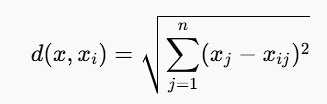

Setelah mendapatkan K tetangga, nilai prediksi dihitung sebagai rata-rata nilai target-nya:

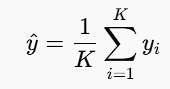
---

### 🔹 Decision Tree Regressor
Decision Tree melakukan pemisahan data berdasarkan fitur yang dapat mengurangi error terbesar (biasanya menggunakan MSE). Setiap cabang akan memilih split terbaik berdasarkan kriteria:

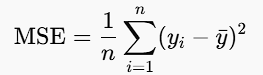
Model akan terus membagi data hingga mencapai kondisi tertentu (seperti kedalaman maksimum, jumlah minimum sampel, dsb).

---

### 🔹 Evaluasi Regresi

#### 1. Mean Squared Error (MSE)
Mengukur rata-rata kuadrat selisih antara prediksi dan nilai aktual:

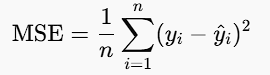

#### 2. Root Mean Squared Error (RMSE)
Akar dari MSE, digunakan agar nilai error berada pada skala yang sama dengan data:

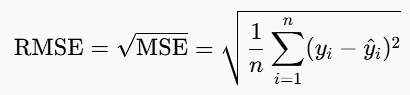

#### 3. Mean Absolute Error (MAE)
Mengukur rata-rata absolut error:

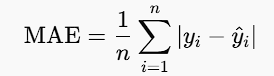

#### 4. R-Squared (R²)
Menunjukkan seberapa besar variansi pada data target yang bisa dijelaskan oleh model:

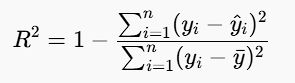


Nilai R² mendekati 1 berarti model semakin baik.

